In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as linear_model
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats.mstats import winsorize
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
x= iris.data
y= iris.target

In [3]:
np.random.seed(42)
outlier_indices = np.random.choice(x.shape[0],10, replace=False)
x[outlier_indices] = x[outlier_indices] * 10

Text(0, 0.5, 'Values')

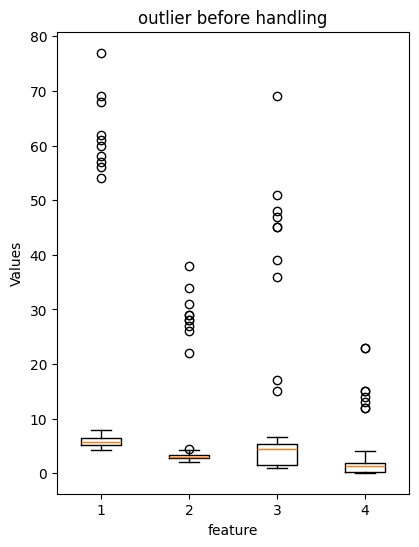

In [4]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
plt.boxplot(x)
plt.title("outlier before handling")
plt.xlabel("feature")
plt.ylabel("Values")

In [6]:
x_winsorize = winsorize(x, limits= (0.05, 0.05))

Text(0, 0.5, 'Values')

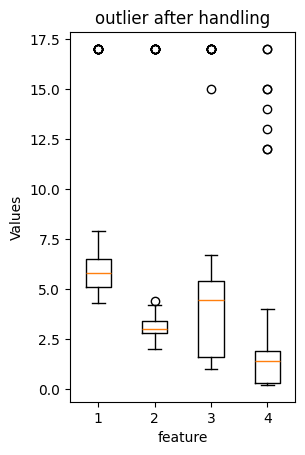

In [7]:
plt.subplot(1,2,2)
plt.boxplot(x_winsorize)
plt.title("outlier after handling")
plt.xlabel("feature")
plt.ylabel("Values")

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x_winsorize ,y, test_size=0.2, random_state=42)

In [12]:
sacler = StandardScaler()
x_train_scaler = sacler.fit_transform(x_train)
x_test_scaler = sacler.transform(x_test)

In [15]:
model_before = LogisticRegression(random_state = 42)
model_before.fit(x_train_scaler, y_train)

LogisticRegression(random_state=42)

In [16]:
y_pred_before =  model_before.predict(x_test_scaler)
accuracy_before = accuracy_score(y_test,y_pred_before)
print("accuracy score", accuracy_before)
print("classification report before modaling outliners")
print(classification_report(y_test, y_pred_before))
print("confusion_matrix before handling outline")
print(confusion_matrix(y_test, y_pred_before))


accuracy score 0.8
classification report before modaling outliners
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.33      0.50         9
           2       0.65      1.00      0.79        11

    accuracy                           0.80        30
   macro avg       0.88      0.78      0.76        30
weighted avg       0.87      0.80      0.77        30

confusion_matrix before handling outline
[[10  0  0]
 [ 0  3  6]
 [ 0  0 11]]
